In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import feature_engine.imputation as imp
from feature_engine.encoding import OneHotEncoder

import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("Xtrain_feature_sel_high_tol.csv")
X_test = pd.read_csv("Xtest_feature_sel_high_tol.csv")
ytrain = pd.read_csv("ytrain_mod.csv")
ytest = pd.read_csv("ytest_mod.csv")
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(ytrain.shape))
print("Shape of y Test: {}".format(ytest.shape))

Shape of X Train: (8672, 55)
Shape of X Test: (2168, 55)
Shape of y Train: (8672, 1)
Shape of y Test: (2168, 1)


In [3]:
# types of the variables
X_train.dtypes

Reviews                         float64
Rating                          float64
days_since_update               float64
Price                           float64
Category_TRAVEL_AND_LOCAL         int64
Category_VIDEO_PLAYERS            int64
Category_FINANCE                  int64
Category_FAMILY                   int64
Category_MEDICAL                  int64
Category_GAME                     int64
Category_SOCIAL                   int64
Category_PERSONALIZATION          int64
Category_PHOTOGRAPHY              int64
Category_MAPS_AND_NAVIGATION      int64
Category_HEALTH_AND_FITNESS       int64
Category_COMMUNICATION            int64
Category_Rare                     int64
Category_DATING                   int64
Category_TOOLS                    int64
Category_LIFESTYLE                int64
Category_BUSINESS                 int64
Category_PRODUCTIVITY             int64
Category_BOOKS_AND_REFERENCE      int64
Category_SHOPPING                 int64
Category_EDUCATION                int64


In [4]:
variable = "Size_Varies with device"

# create linear regression
regr = linear_model.LinearRegression()
# train model using training set
reg = regr.fit(X_train[[variable]],ytrain)

In [5]:
# regression coefficients
print('Coefficients: ', reg.coef_)
# intercept
print('intercept: ', reg.intercept_)

Coefficients:  [[55273727.54366109]]
intercept:  [7093261.27724535]


Text(0, 0.5, 'Installs')

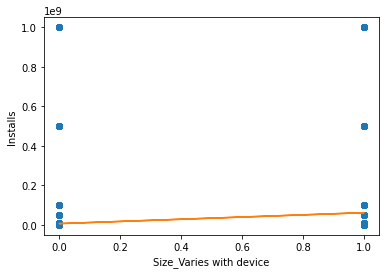

In [6]:
plt.plot(X_train[[variable]],ytrain,'o')
plt.plot(X_train[[variable]],reg.coef_*X_train[[variable]]+reg.intercept_)

plt.xlabel(X_train[[variable]].columns[0])
plt.ylabel("Installs")

# go through all variables

In [7]:
def lin_reg(variable):
    
    # create linear regression
    regr = linear_model.LinearRegression()
    # train model using training set
    reg = regr.fit(X_train[[variable]],ytrain)

    plt.plot(X_train[[variable]],ytrain,'o')
    plt.plot(X_train[[variable]],reg.coef_*X_train[[variable]]+reg.intercept_)

    plt.xlabel(X_train[[variable]].columns[0])
    plt.ylabel("Installs")
    
    plt.savefig('plot.jpg' + variable, format='jpg')
    
    return [reg.coef_, reg.intercept_]

In [8]:
column_names = X_train.columns.tolist()
column_names

['Reviews',
 'Rating',
 'days_since_update',
 'Price',
 'Category_TRAVEL_AND_LOCAL',
 'Category_VIDEO_PLAYERS',
 'Category_FINANCE',
 'Category_FAMILY',
 'Category_MEDICAL',
 'Category_GAME',
 'Category_SOCIAL',
 'Category_PERSONALIZATION',
 'Category_PHOTOGRAPHY',
 'Category_MAPS_AND_NAVIGATION',
 'Category_HEALTH_AND_FITNESS',
 'Category_COMMUNICATION',
 'Category_Rare',
 'Category_DATING',
 'Category_TOOLS',
 'Category_LIFESTYLE',
 'Category_BUSINESS',
 'Category_PRODUCTIVITY',
 'Category_BOOKS_AND_REFERENCE',
 'Category_SHOPPING',
 'Category_EDUCATION',
 'Category_NEWS_AND_MAGAZINES',
 'Category_FOOD_AND_DRINK',
 'Category_ENTERTAINMENT',
 'Size_Varies with device',
 'Size_0.1-10MB',
 'Size_40.1-50MB',
 'Size_10.1-20MB',
 'Size_90.1-100MB',
 'Size_50.1-60MB',
 'Size_80.1-90MB',
 'Size_30.1-40MB',
 'Size_60.1-70MB',
 'Size_20.1-30MB',
 'Size_70.1-80MB',
 'Type_Paid',
 'Content Rating_Everyone',
 'Content Rating_Teen',
 'Content Rating_Everyone 10+',
 'Content Rating_Mature 17+',
 'C

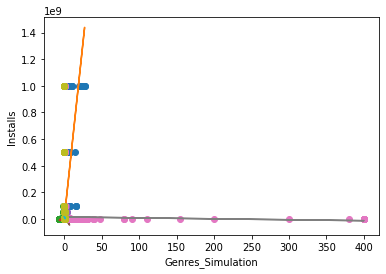

In [9]:
lin_reg_analysis = pd.DataFrame(columns=['variable', 'coefficients', 'intercept'])

for column_name in column_names:
    lin_reg_list = lin_reg(column_name)
    lin_reg_analysis.loc[len(lin_reg_analysis)] = [column_name, lin_reg_list[0][0][0], lin_reg_list[1][0]]


In [10]:
lin_reg_analysis.sort_values("coefficients")

,variable,coefficients,intercept
29,Size_0.1-10MB,-2.320462e+07,2.451705e+07
39,Type_Paid,-1.701914e+07,1.709222e+07
8,Category_MEDICAL,-1.638802e+07,1.650618e+07
49,Genres_Education,-1.561648e+07,1.663020e+07
44,Content Rating_Rare,-1.543213e+07,1.581976e+07
16,Category_Rare,-1.524437e+07,1.674608e+07
17,Category_DATING,-1.503149e+07,1.613851e+07
19,Category_LIFESTYLE,-1.485349e+07,1.632477e+07
6,Category_FINANCE,-1.425128e+07,1.626292e+07
20,Category_BUSINESS,-1.422507e+07,1.640973e+07


In [11]:
lin_reg_analysis.to_csv("lin_reg_analysis_high_tol",index=False)